In [19]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
img = cv2.imread('./data/virat_kohli/virat_kohli11.png')
img.shape

(71, 71, 3)

In [21]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(71, 71)

In [22]:
gray

array([[ 70,  82,  88, ..., 246, 248, 251],
       [ 74, 106, 110, ..., 246, 246, 251],
       [104, 111,  86, ..., 248, 246, 251],
       ...,
       [ 40,  37,  35, ...,  15,  33,  27],
       [ 34,  34,  33, ...,  33,  21,  28],
       [ 33,  33,  33, ...,  52,  19,  29]], dtype=uint8)

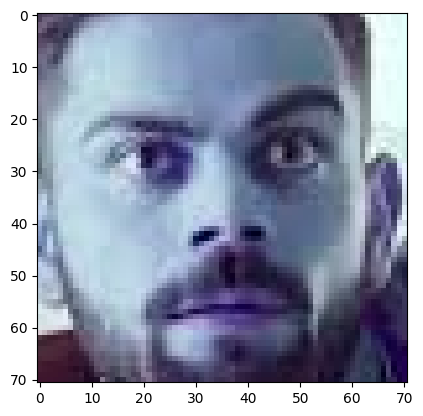

In [23]:
plt.imshow(img,cmap='gray')

In [24]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.2)
faces

array([[ 6,  5, 60, 60]], dtype=int32)

In [25]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(6), np.int32(5), np.int32(60), np.int32(60))

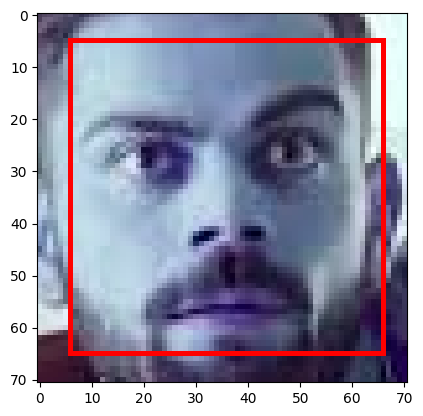

In [26]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
plt.imshow(face_img)

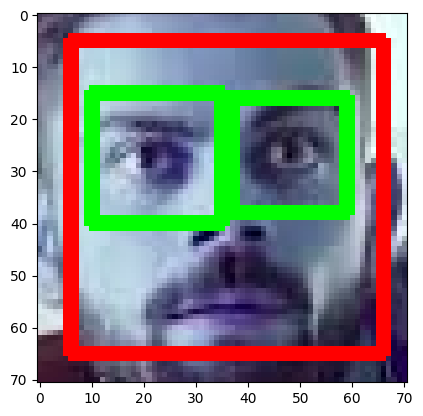

In [27]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [28]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2 :
            return roi_color

In [29]:
path_to_data = './data'
path_to_cr_data = './data/cropped'

In [30]:
import os 
img_dirs =[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        print(entry.path)
        img_dirs.append(entry.path)

./data\cropped
./data\lionel_messi
./data\maria_sharapova
./data\roger_federer
./data\serena_williams
./data\virat_kohli


In [31]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [32]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]    
    celebrity_file_names_dict[celebrity_name] = []

    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None :
            cropped_folder = path_to_cr_data +"/"+ celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print(f"Generating  cropped images in folder {cropped_folder}")

            cropped_file_name = celebrity_name + str(count) +".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating  cropped images in folder ./data/cropped/lionel_messi
Generating  cropped images in folder ./data/cropped/maria_sharapova
Generating  cropped images in folder ./data/cropped/roger_federer
Generating  cropped images in folder ./data/cropped/serena_williams
Generating  cropped images in folder ./data/cropped/virat_kohli


In [33]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [34]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./data/cropped/lionel_messi/lionel_messi1.png',
  './data/cropped/lionel_messi/lionel_messi2.png',
  './data/cropped/lionel_messi/lionel_messi3.png',
  './data/cropped/lionel_messi/lionel_messi4.png',
  './data/cropped/lionel_messi/lionel_messi5.png',
  './data/cropped/lionel_messi/lionel_messi6.png',
  './data/cropped/lionel_messi/lionel_messi7.png',
  './data/cropped/lionel_messi/lionel_messi8.png',
  './data/cropped/lionel_messi/lionel_messi9.png',
  './data/cropped/lionel_messi/lionel_messi10.png',
  './data/cropped/lionel_messi/lionel_messi11.png',
  './data/cropped/lionel_messi/lionel_messi12.png',
  './data/cropped/lionel_messi/lionel_messi13.png',
  './data/cropped/lionel_messi/lionel_messi14.png',
  './data/cropped/lionel_messi/lionel_messi15.png',
  './data/cropped/lionel_messi/lionel_messi16.png',
  './data/cropped/lionel_messi/lionel_messi17.png',
  './data/cropped/lionel_messi/lionel_messi18.png',
  './data/cropped/lionel_messi/lionel_mes

In [35]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [36]:
X, y = [], []
for celebrity_name , training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [42]:
len(X[0]) , 32*32*3 + 32*32

(4096, 4096)

In [43]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(140, 4096)

## Data Cleaning is done , Now Time for Data Training

we will use SVM

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8571428571428571

In [50]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.67      1.00      0.80         8
           3       1.00      0.67      0.80         3
           4       1.00      0.83      0.91         6
           5       0.88      0.88      0.88         8

    accuracy                           0.86        35
   macro avg       0.91      0.84      0.85        35
weighted avg       0.90      0.86      0.86        35



# Lets Use Grid Search CV

In [51]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [52]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [53]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\asus\Desktop\AI_Projects\ImageClassification\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\asus\Desktop\AI_Projects\ImageClassification\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\asus\Desktop\AI_Projects\ImageClassification\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\asus\Desktop\AI_Projects\

,model,best_score,best_params
0,svm,0.847619,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.628571,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.838095,{'logisticregression__C': 1}


In [54]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [55]:
best_estimators['svm'].score(X_test,y_test)

0.8571428571428571

In [56]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8571428571428571

In [57]:
best_clf = best_estimators['svm']

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[8, 1, 0, 0, 1],
       [0, 8, 0, 0, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 0, 5, 0],
       [0, 1, 0, 0, 7]])

Text(95.72222222222221, 0.5, 'Truth')

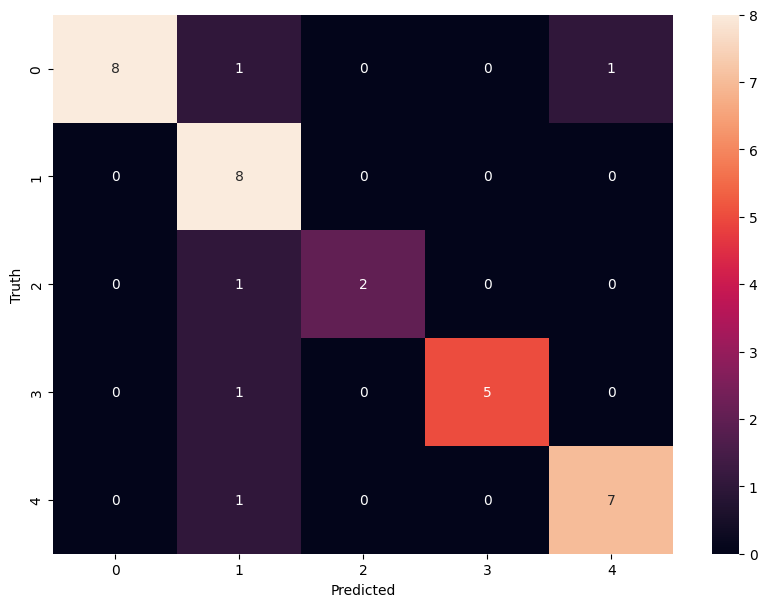

In [59]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Save the Trained Model

In [60]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [61]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))